In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [74]:
raw_data =pd.read_csv('Index2018.csv')

In [75]:
df_comp =raw_data.copy()

In [76]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [77]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Text(0.5, 1.0, 'S&P vs FTSE')

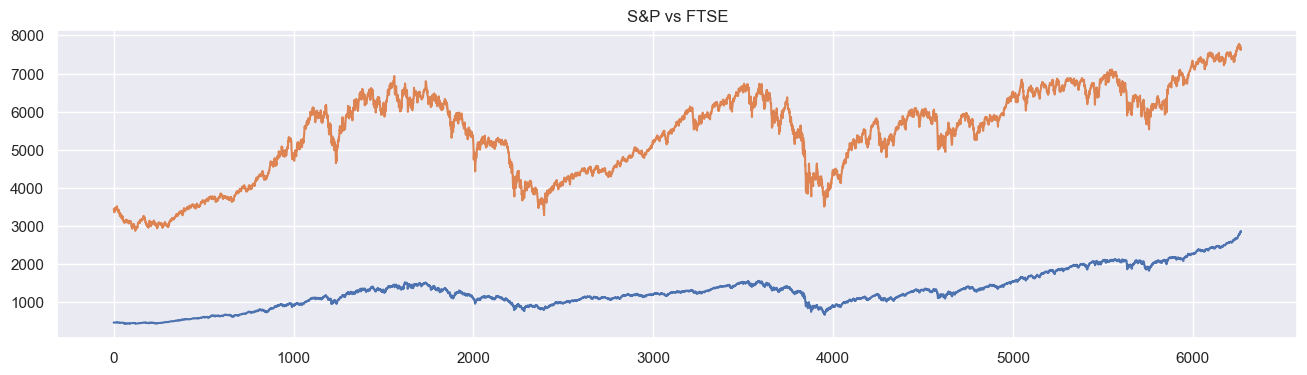

In [78]:
df_comp.spx.plot(figsize=(20,4),title='S&P Prices')
df_comp.ftse.plot(figsize=(16,4),title='FTSE Prices')
plt.title('S&P vs FTSE')

In [79]:
import scipy.stats
import pylab

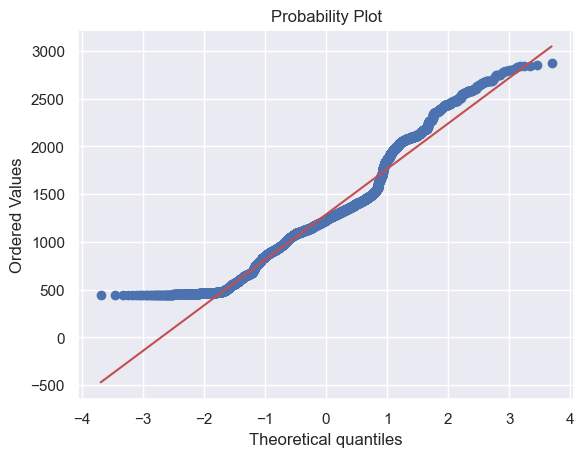

In [80]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

In [81]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [82]:
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)

In [83]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [84]:
df_comp.set_index('date',inplace=True)

In [85]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [86]:
df_comp = df_comp.asfreq('b')

In [87]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [88]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [89]:
df_comp.spx =df_comp.spx.fillna(method='ffill')
df_comp.dax =df_comp.dax.fillna(method='bfill')
df_comp.ftse =df_comp.ftse.fillna(value=df_comp.ftse.mean())
df_comp.nikkei =df_comp.nikkei.fillna(value=df_comp.nikkei.median())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7948\1153221046.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.spx =df_comp.spx.fillna(method='ffill')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7948\1153221046.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.dax =df_comp.dax.fillna(method='bfill')


In [90]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [91]:
df_comp['market_value'] = df_comp.spx

In [92]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [93]:
del df_comp['spx'] ,df_comp['dax'] ,df_comp['ftse'] ,df_comp['nikkei']

In [95]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [96]:
size = int(len(df_comp)*.8)
size

5021

In [97]:
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [99]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [100]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [102]:
Wn =np.random.normal(loc=df_comp.mean(),scale=df_comp.std(),size=len(df_comp))

In [103]:
df_comp['Wn'] = Wn

In [105]:
df_comp.describe()

,market_value,Wn
count,6277.000000,6277.000000
mean,1288.642547,1282.689033
std,487.868210,489.488460
min,438.920000,-547.937626
25%,992.715221,949.267932
50%,1233.761241,1279.288227
75%,1460.250000,1609.661066
max,2872.867839,3183.342996


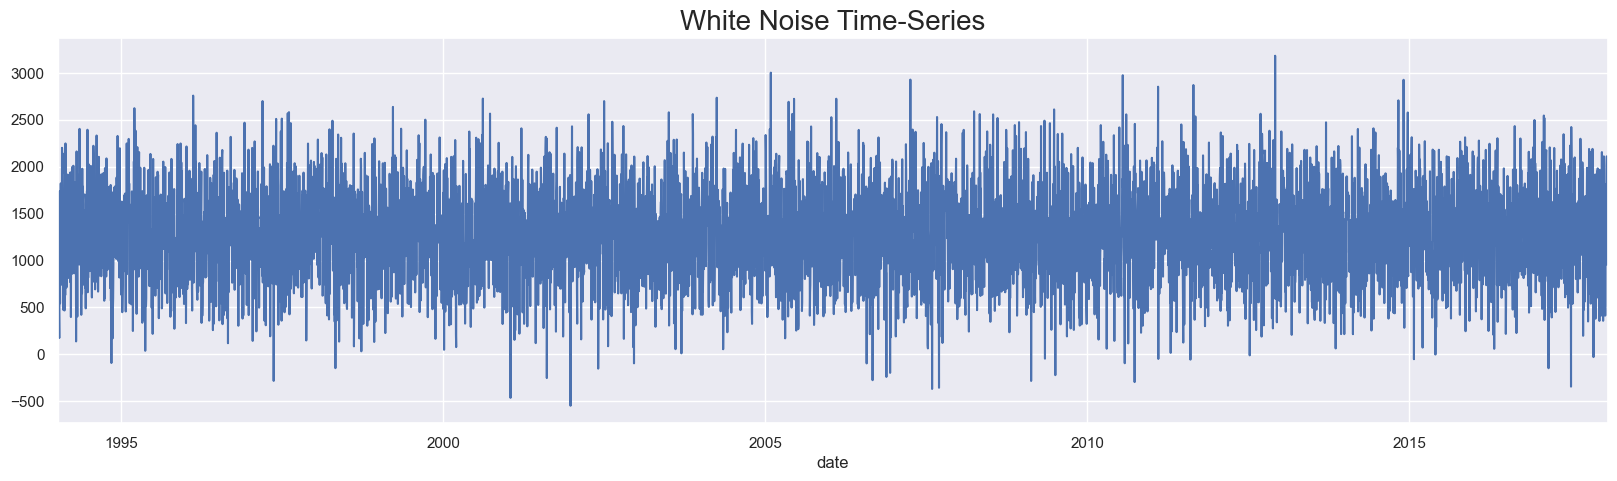

In [109]:
df_comp.Wn.plot(figsize=(20,5))
plt.title('White Noise Time-Series',size=20)
plt.show()

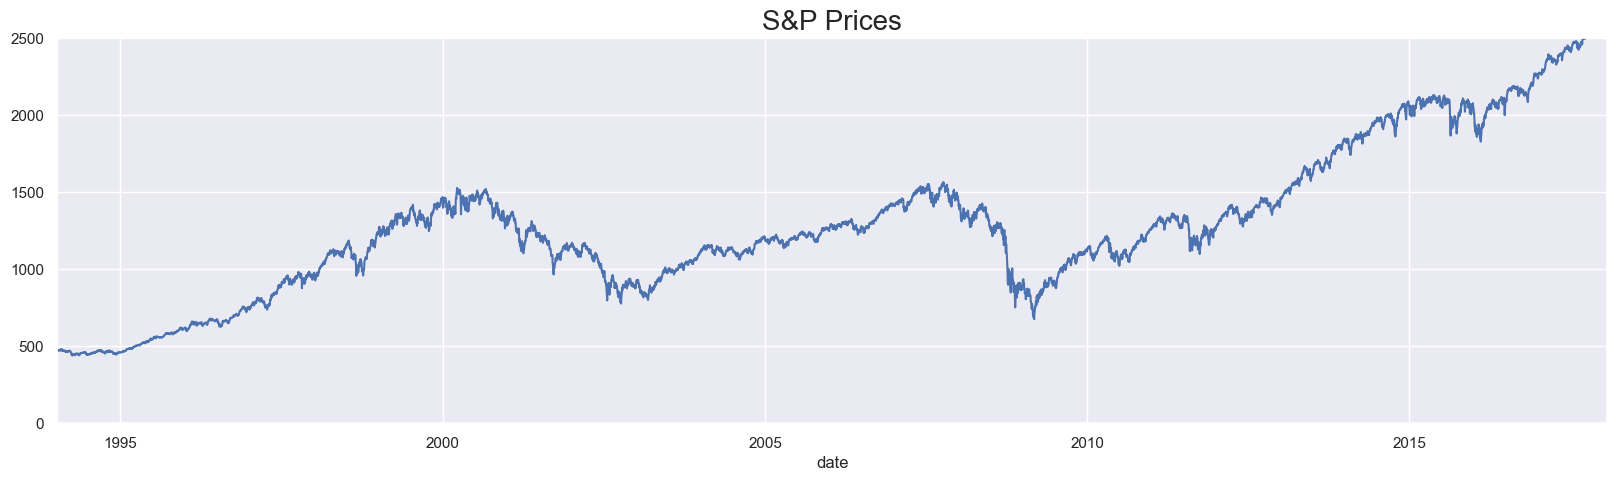

In [114]:
df_comp.market_value.plot(figsize=(20,5))
plt.title('S&P Prices',size=20)
plt.ylim(0,2500)
plt.show()